<a href="https://colab.research.google.com/github/Veena4512/Emotion_in_Text/blob/main/Copy_of_Copy_of_Emotion_in_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
import seaborn as sns
import nltk
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


READING CSV FILE

In [ ]:
df = pd.read_csv('Emotion_final.csv')

EXPLORING DATA

In [ ]:
df.shape

(21459, 2)

In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i feel so tortured by it,happy
freq,2,7029


In [ ]:
# check for missing values using the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


PREPROCESSING DATA

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
vectorizer = CountVectorizer(stop_words='english')
preprocessed_data = []
for text in df['Text']:
    # Tokenize the text
    tokens = nltk.word_tokenize(text) 
    # Remove stopwords, lowercase, and stem
    words = [stemmer.stem(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    # Join the words back into a single string
    preprocessed_data.append(' '.join(words))
    
X = vectorizer.fit_transform(df['Text'])
y = df['Emotion']
# Split the data into training and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)



In [ ]:
validation_scores,testing_scores,training_score=[],[],[]


MNB

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_train = mnb.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
training_score.append(accuracy*100)
print("Accuracy on training data:", accuracy*100)
y_test_pred = mnb.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
testing_scores.append(test_score*100)
print('Test score:', test_score*100)
y_val_pred = mnb.predict(X_val)
val_score = accuracy_score(y_val, y_val_pred)
validation_scores.append(val_score*100)
print('Validation score:', val_score*100)



Accuracy on training data: 88.05436893203884
Test score: 75.69897483690588
Validation score: 75.72227399813607


SVM

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
training_score.append(accuracy*100)
print("Accuracy on training data:", accuracy*100)
y_test_pred = svm.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
testing_scores.append(test_score*100)
print('Test score:', test_score*100)
y_val_pred = svm.predict(X_val)
val_score = accuracy_score(y_val, y_val_pred)
validation_scores.append(val_score*100)
print('Validation score:', val_score*100)


Accuracy on training data: 98.94368932038834
Test score: 87.39515377446412
Validation score: 86.97576887232059


RANDOM FOREST

In [ ]:
rd = RandomForestClassifier(n_estimators=100,random_state=42)
rd.fit(X_train, y_train)
y_pred_train = rd.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
training_score.append(accuracy*100)
print("Accuracy on training data:", accuracy*100)
y_test_pred = rd.predict(X_test)
test_score = accuracy_score(y_test, y_test_pred)
testing_scores.append(test_score*100)
print('Test score:', test_score*100)
y_val_pred = rd.predict(X_val)
val_score = accuracy_score(y_val, y_val_pred)
validation_scores.append(val_score*100)
print('Validation score:', val_score*100)



Accuracy on training data: 99.75145631067961
Test score: 88.32712022367195
Validation score: 87.5116495806151


PERFORMANCE METRICS

In [ ]:
models=[' Multinomial Naive Bayes','Support Vector Machines','Random Forest']
from tabulate import tabulate
data = []
for i in range(len(models)):
    data.append([models[i],training_score[i],testing_scores[i], validation_scores[i]])

# Print the table
print(tabulate(data, headers=['Model','Train_Score', 'Test_Score', 'Validation_Score']))

Model                      Train_Score    Test_Score    Validation_Score
-----------------------  -------------  ------------  ------------------
Multinomial Naive Bayes        88.0544       75.699              75.7223
Support Vector Machines        98.9437       87.3952             86.9758
Random Forest                  99.7515       88.3271             87.5116


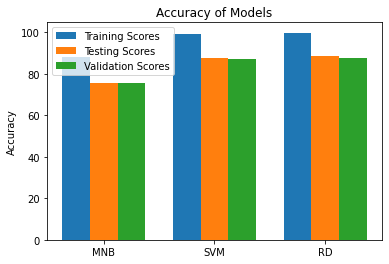

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axes objects
fig, ax = plt.subplots()

# Set the bar width
bar_width = 0.25

# Set the x-axis labels
x_labels = ['MNB', 'SVM', 'RD']

# Set the bar positions
training_pos = np.arange(len(x_labels))
testing_pos = [x + bar_width for x in training_pos]
validation_pos = [x + bar_width * 2 for x in training_pos]

# Plot the bars
ax.bar(training_pos, training_score, bar_width, label='Training Scores')
ax.bar(testing_pos, testing_scores, bar_width, label='Testing Scores')
ax.bar(validation_pos,validation_scores, bar_width, label='Validation Scores')

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the chart title and legend
ax.set_title('Accuracy of Models')
ax.legend()

# Set the x-axis labels
ax.set_xticks([x + bar_width for x in range(len(x_labels))])
ax.set_xticklabels(x_labels)

# Show the chart
plt.show()


TESTING WITH CUSTOM INPUT

In [ ]:
!pip install -q gradio

In [ ]:
import gradio as gr

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import gradio as gr

# Replace this function with your own emotion detection function
def detect_emotion(text):
    preprocessed_text=vectorizer.transform([text])
    # Your code here to detect emotion in the input text
    predicted_label1 = mnb.predict(preprocessed_text)[0]
    predicted_label2 = svm.predict(preprocessed_text)[0]
    predicted_label3 = rd.predict(preprocessed_text)[0]
    from collections import Counter
    b=[predicted_label1,predicted_label2,predicted_label3]
    d=Counter(b)
    n=[i for i,j in d.items() if j==max(d.values())]
    h = {'sadness':"😞", 'surprise':"😮",'happy':"😄",'angry':"😡",'fear':"😱"}
    return n[0]+h[n[0]] # Replace with the detected emotion

# Create the Gradio interface
iface = gr.Interface(
    fn=detect_emotion,
    inputs=gr.inputs.Textbox(label="Enter text"),
    outputs=gr.outputs.Textbox(label="Detected emotion"),
    title="Emotion Detector",
    description="Enter text and the model will detect the emotion in the text."
)

# Launch the interface
iface.launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>